# Diamond-square algorithm

## Description

The diamond-square algorithm begins with a two-dimensional square array of width and height 2<sup>n</sup> + 1. The four corner points of the array must first be set to initial values. The diamond and square steps are then performed alternately until all array values have been set.

 - The diamond step: For each square in the array, set the midpoint of that square to be the average of the four corner points plus a random value.
 - The square step: For each diamond in the array, set the midpoint of that diamond to be the average of the four corner points plus a random value.

At each iteration, the magnitude of the random value should be reduced.

During the square steps, points located on the edges of the array will have only three adjacent values set rather than four. There are a number of ways to handle this complication - the simplest being to take the average of just the three adjacent values. Another option is to 'wrap around', taking the fourth value from the other side of the array. When used with consistent initial corner values this method also allows generated fractals to be stitched together without discontinuities.

## Visualization

The image below shows the steps involved in running the diamond-square algorithm on a 5 × 5 array.

![grafik.png](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Diamond_Square.svg/1920px-Diamond_Square.svg.png)

### Thanks wikipedia so far!

# First steps

To make life easier we won't use stacked list for a 2d map of values.  
I know it's more efficient and probably has other benefits too.  
We will use a wrapper-class for a dict to use it like a Java Map. Let's import some utilities too.

In [1]:
from map_3d import Map_3D

import math
import random as rn
import numpy as np
import matplotlib.pyplot as plt

We need to configure matplot to display the plots in the notebook.

In [2]:
%matplotlib inline

We want maps of arbitrary size. To accomplish this we will need to now if the size we want fits the formula 2<sup>n</sup>+1 or get the next greater value that does. The following function will return this value.

In [3]:
def get_min_size(x: int) -> int:
    if (x < 3):   # no map size smaller than 3
        return 3
    n = np.log2(x-1)
    if (n == math.floor(n)):
        return x
    return 2**(math.floor(n)+1)+1

The start of the alogrithm is to set the four corner values. We need to define the range of this values.

In [4]:
def set_init_values(map: Map_3D, scale: float):
    map.set((0, 0), rn.random()*scale)
    map.set((0, map.get_size()-1), rn.random()*scale)
    map.set((map.get_size()-1, 0), rn.random()*scale)
    map.set((map.get_size()-1, map.get_size()-1), rn.random()*scale)

The two corner stones of this algorithm are the diamond and square steps to fill the map successively.

# Iterating Ideas  
First we want to find the value in the center of the whole square (diamond) and calculate the center of each edge (square).  
Afterwards we devide the square up into 4 smaller squares using the existing values as the new corners for a new iteration.

Using the formula 2<sup>n</sup>+1 we know that we need to iterate n times over the square to fill all field.  
Counting down from n we will also know the size of the currently selected square. The algorithm also dictates that with each division the random value is decreased.  
Dividing the whole square up into little squares we need a way to address which square is meant. Therefore we can use a x and y offset.    
The upper left square is indexed as (0, 0), the upper right as (1, 0) and so on. To adress the fields of these squares we use the offset combined with the map size.

In [5]:
def diamond_step(map: Map_3D, scale: float, iter: int, x_off:int=0, y_off:int=0):
    map_size = 2**iter
    
    upper_left = map.get((map_size*x_off, map_size*y_off))
    upper_right = map.get((map_size*x_off, map_size*y_off + map_size))
    lower_left = map.get((map_size*x_off + map_size, map_size*y_off))
    lower_right = map.get((map_size*x_off + map_size, map_size*y_off + map_size))
    
    rand = rn.random() * iter * scale
    map.set((map_size//2 + map_size*x_off, map_size//2 + map_size*y_off), \
        (upper_left + upper_right + lower_left + lower_right) / 4 + rand)

In [6]:
def square_step(map: Map_3D, scale: float, iter: int, x_off:int=0, y_off:int=0):
    map_size = 2**iter
    
    upper_left = map.get((map_size*x_off, map_size*y_off))
    upper_right = map.get((map_size*x_off + map_size, map_size*y_off))
    lower_left = map.get((map_size*x_off, map_size*y_off + map_size))
    lower_right = map.get((map_size*x_off + map_size, map_size*y_off + map_size))
    center = map.get((map_size*x_off + map_size//2, map_size*y_off + map_size//2))
    
    rand = rn.random() * iter * scale
    map.set((map_size*x_off + map_size//2, map_size*y_off), (upper_left + center + upper_right) / 3 + rand)
    rand = rn.random() * iter * scale
    map.set((map_size*x_off, map_size*y_off + map_size//2), (upper_left + center + lower_left) / 3 + rand)
    rand = rn.random() * iter * scale
    map.set((map_size*x_off + map_size//2, map_size*y_off + map_size), (lower_left + center + lower_right) / 3 + rand)
    rand = rn.random() * iter * scale
    map.set((map_size*x_off + map_size, map_size*y_off + map_size//2), (upper_right + center + lower_right) / 3 + rand)

# Implementation  
Using the given methodes we can start to realise the algorithm.

In [7]:
map_size = 500 # our first map has a size of 500*500
scale = 10 # the range of random values lies between 0 and 10

Now we calculate the size of the next bigger fitting square and create a map of this size.

In [8]:
min_size = get_min_size(map_size)
map = Map_3D(min_size)

We set the start values in the 4 corners.

In [9]:
set_init_values(map, scale)

We calculate how many iterations we need...

In [10]:
max_iter = int(np.log2(map.get_size()-1))

... and we iterate over these values from high to low adressing all squares with offsets.

In [11]:
for iter in range(max_iter, 0, -1):
    for x_off in range(2**(max_iter-iter)):
        for y_off in range(2**(max_iter-iter)):
            diamond_step(map, scale,  iter, x_off, y_off)
            square_step(map, scale, iter, x_off, y_off)

Currently the map has a size of min_size\*min_size. We need to trim it to map_size\*map_size.

In [12]:
map.trim(map_size)

We can use the build-in export function to convert the map type to a list of lists which we can use to plot our data.

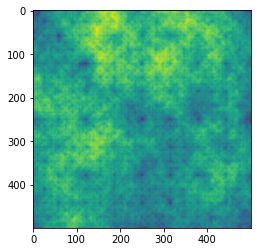

In [13]:
data = map.export()
plt.imshow(data)
plt.show()